## Desafío 10 de Fin de Curso: "Python Data Journey"

Introducción
En el viaje que es la programación en Python, hemos atravesado desde las praderas de las variables y los bucles hasta las montañas de las estructuras de datos complejas y la interacción con archivos. Ahora, al final de este curso de Programación I en Python, nos enfrentamos a un reto integral que pone a prueba todo lo aprendido y un poco más. ¡Es hora de aplicar tus habilidades en un proyecto que simule un escenario del mundo real!
- Objetivos
    + Consolidar los conocimientos adquiridos durante el curso de Python en un proyecto aplicado.
    + Desarrollar un programa que procese datos de archivos y presente resultados analíticos.
    + Familiarizarse con el uso de control de versiones utilizando GitHub.
    + Demostrar buenas prácticas de codificación y documentación de código.
- Metodología
    + Planificación: Antes de escribir una línea de código, planifica tu enfoque. Define qué estructuras de datos utilizarás, cómo manejarás la entrada/salida de archivos y qué lógica aplicarás para el procesamiento de datos.
    + Desarrollo Iterativo: Comienza con las funcionalidades básicas y avanza incrementando la complejidad. Después de cada función o módulo completado, realiza pruebas para garantizar la funcionalidad.
    + Refactorización: Una vez que tengas un prototipo funcional, revisa tu código y mejóralo. Elimina redundancias y asegúrate de que tu código es limpio y legible.
    + Control de Versiones: Utiliza GitHub para mantener un registro de tus cambios y versiones. Asegúrate de hacer commits claros y concisos que reflejen cada etapa importante del desarrollo de tu software.
- Uso de GitHub
    + Inicializa un repositorio en GitHub al comienzo de tu proyecto.
    + Realiza commits pequeños y frecuentes con mensajes descriptivos.
    + Mantén una estructura de directorios limpia y profesional en tu repositorio.
    + Incluye un archivo README.md que proporcione una descripción clara del proyecto, cómo ejecutarlo y ejemplos de uso.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

%matplotlib inline

In [12]:
data = pd.read_csv('C:\\Users\\ivann\\OneDrive\\Documents\\MCD\\Datos\\OnlineRetail.csv', sep=",", encoding='ISO-8859-1', header=0)
data.head(8)

C:\Users\ivann\AppData\Local\Temp\ipykernel_1700\1166678587.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\ivann\\OneDrive\\Documents\\MCD\\Datos\\OnlineRetail.csv', sep=",", encoding='ISO-8859-1', header=0)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom


## 1 Elección de variables

En este ejemplo, se hace el clustering utilizando 3 variables:

* Número de días desde la última compra
* Número de transacciones
* Cantidad Total gastada en las transacciones por cliente

In [16]:
## Columna: Cantidad Total de transacciones

data_retail['Total_amount'] = data_retail['Quantity'] * data_retail['UnitPrice']

# Crear un nuevo dataframe donde se agrupa todo el total por mismo CustomerID

data_m = data_retail.groupby('CustomerID')['Total_amount'].sum()
data_m = data_m.reset_index() # se resetea el índice del data frame
data_m.head(5)

C:\Users\ivann\AppData\Local\Temp\ipykernel_1700\2562393747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_retail['Total_amount'] = data_retail['Quantity'] * data_retail['UnitPrice']


,CustomerID,Total_amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [17]:
## Columna: Número de transacciones por cliente (frecuencia)

data_f = data_retail.groupby('CustomerID')['InvoiceNo'].count() # Se cuenta el numero de veces que compra un cliente
data_f = data_f.reset_index() # se resetea el índice del data frame
data_f.head(5)

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
### Se hace un inner join de esta información en un nuevo dataframe

data_retail_2 = pd.merge(data_m, data_f,
                         on = 'CustomerID',
                         how = 'inner')
data_retail_2.head(5)

,CustomerID,Total_amount,InvoiceNo
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
## Columna: días después de la última compra
## Se tiene que especificar qué formato tenía originalmente la información


data_retail['InvoiceDate'] = pd.to_datetime(data_retail['InvoiceDate'],
                                            format = '%m/%d/%Y %H:%M')

data_retail.head(5)

C:\Users\ivann\AppData\Local\Temp\ipykernel_1700\2474111148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_retail['InvoiceDate'] = pd.to_datetime(data_retail['InvoiceDate'],


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
## numéro de días después de la última transaccion, por cliente

# Fecha más reciente en el dataset
max_date = max(data_retail['InvoiceDate'])
print('Fecha más reciente = ', max_date)

# Diferencia entre la fecha más reciente y la fecha de las transacciones
# La mínima de estas fechas, por cliente único, nos dice los días de la última transaccion
data_retail['Diff'] = max_date - data_retail['InvoiceDate']
print(data_retail.head(5))

# Se hace un dataframe con los dias de la última transaccion, por cliente único

data_p = data_retail.groupby('CustomerID')['Diff'].min()
data_p = data_p.reset_index()
data_p.head(5)

Fecha más reciente =  2011-12-09 12:50:00
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total_amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   

               Diff  
0 373 days 04:24:00  
1 373 days 0

C:\Users\ivann\AppData\Local\Temp\ipykernel_1700\1365342315.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_retail['Diff'] = max_date - data_retail['InvoiceDate']


,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [25]:
# Se extrae únicamente los días
data_p['Diff'] = data_p['Diff'].dt.days
data_p.head(5)

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [26]:
# Se hace un inner join con el dataframe de frecuencia y total amount

data_retail_3 = pd.merge(data_retail_2, data_p,
                         on = 'CustomerID',
                         how = 'inner')

# Renombrar columnas
data_retail_3.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
data_retail_3.head(5)

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Sobre este nuevo dataframe es donde se realizará el clustering, utilizando estas tres variables sugeridas, para cada CustomerID único. A continuación, se remueven valores atípicos.

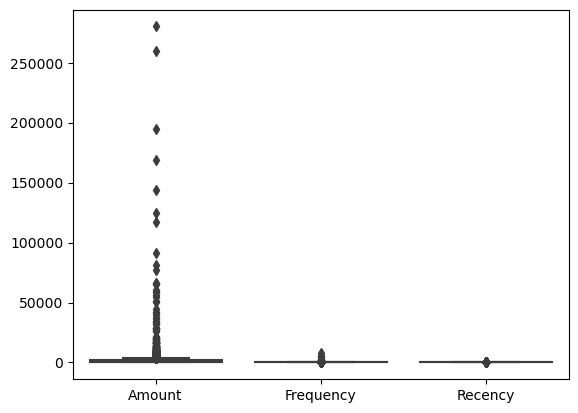

In [27]:
# Boxplot

sns.boxplot(data = data_retail_3[['Amount', 'Frequency', 'Recency']],
            orient = 'v')

plt.show()

In [28]:
# Valores atípicos

# Variable Amount
q_min = data_retail_3.Amount.quantile(0.05)
q_max = data_retail_3.Amount.quantile(0.95)
IQR = q_max - q_min
data_retail_4 = data_retail_3[(data_retail_3.Amount >= q_min - 1.5*IQR) & \
                              (data_retail_3.Amount <= q_max + 1.5*IQR)]

# Variable Frequency
q_min = data_retail_4.Frequency.quantile(0.05)
q_max = data_retail_4.Frequency.quantile(0.95)
IQR = q_max - q_min
data_retail_4 = data_retail_4[(data_retail_4.Frequency >= q_min - 1.5*IQR) & \
                              (data_retail_4.Frequency <= q_max + 1.5*IQR)]

# Variable Recency
q_min = data_retail_4.Recency.quantile(0.05)
q_max = data_retail_4.Recency.quantile(0.95)
IQR = q_max - q_min
data_retail_4 = data_retail_4[(data_retail_4.Recency >= q_min - 1.5*IQR) & \
                              (data_retail_4.Recency <= q_max + 1.5*IQR)]

data_retail_4.head(5)

,CustomerID,Amount,Frequency,Recency
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35


In [29]:
# Shape antes y despues
print('Shape antes = ', data_retail_3.shape)
print('Shape despues = ', data_retail_4.shape)

# Se han ignorado algunos valores atípicos

Shape antes =  (4338, 4)
Shape despues =  (4256, 4)


Las variables a utilizar no tienen la misma escala, por lo que se tienen que normalizar para no tener sesgos en la distancia utilizada en el clustering.

In [30]:
# Mantenemos este dataframe que ya no contiene valores atipicos
df = data_retail_4.copy()
df.head(5)

,CustomerID,Amount,Frequency,Recency
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35


In [33]:
# Normalizacion de datos
# Tener valores entre 0 y 1 (Excepto en la variable CustomerID, esa queda igual)

attributes = ['Amount', 'Frequency', 'Recency']


df_norm = (data_retail_4[attributes] - data_retail_4[attributes].min()) / \
     (data_retail_4[attributes].max() - data_retail_4[attributes].min())

# Opcional (se vuelve a añadir la variable CustomerID)
#df = pd.DataFrame.join(data_retail_4.CustomerID.to_frame(), df,
#                       how = 'left')

df_norm.head(100)

,Amount,Frequency,Recency
1,0.299333,0.255289,0.002681
2,0.124668,0.042313,0.198391
3,0.121909,0.101551,0.048257
4,0.022984,0.022567,0.828418
5,0.173937,0.118477,0.093834
...,...,...,...
97,0.083991,0.039492,0.024129
98,0.051330,0.064880,0.042895
99,0.050451,0.052186,0.501340
101,0.456575,0.476728,0.083110


El último dataframe 'df_norm' es el que se va a utilizar en el modelo. Además de las tres variables de interés sin valores atípicos, también se considera la una normalización **max-min**.

# 2 Clustering jerárquico
Se elige una métrica euclídea con un método de enlace de Ward.


In [34]:
# Generamos los enlaces
Z = linkage(df_norm,"ward",
            metric = 'euclidean')

In [35]:
# Funcion de Dendograma detallado

def dendrogram_detailed(*args, **kwargs):
    max_d = kwargs.pop("max_d", None) ## la maxima distancia de los argumentos
    if max_d  and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerárquico (Detallado)')
        plt.xlabel("Índice del DataSet (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1] # la altura
            if y>annotate_above:
                plt.plot(x,y,'o',c=color)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords='offset points', va='top', ha="center")
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

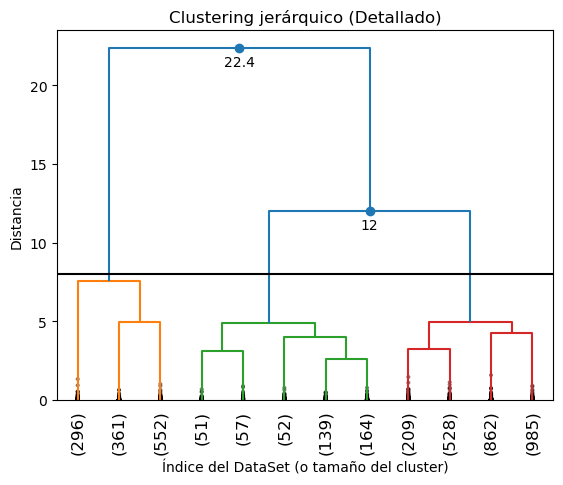

In [36]:
# Visualizamos el dendograma

dendrogram_detailed(Z,truncate_mode='lastp',p=12, leaf_rotation=90.0,leaf_font_size=12.0,
                   show_contracted=True, annotate_above=10, max_d = 8.0)
plt.show()

Vemos que posiblemente hay tres clusters. Utilizamos el método del codo para decidir.

In [37]:
# se fija en la aceleración del cambio
# nos quedamos con los últimos registros
last = Z[-10:,2] # nos quedamos solo con las distancias
last_rev = last[::-1] # la reversa del array
last_rev

array([22.37041928, 11.98619174,  7.58592349,  4.95212709,  4.93382025,
        4.91990099,  4.27095323,  3.98861936,  3.21003985,  3.11042712])

In [38]:
# tomamos indices
idx = np.arange(1,len(last) + 1)

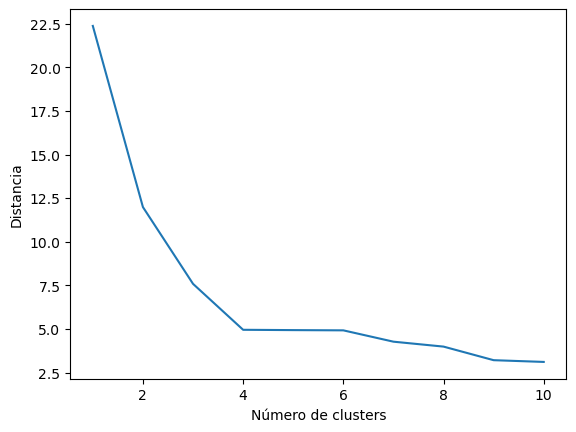

In [39]:
plt.plot(idx,last_rev)
plt.ylabel('Distancia')
plt.xlabel('Número de clusters')
plt.show()

Fuera del 'bump' en el índice 5, parece ser que una elección de 3 clusters es decente.

El método **cut_tree** de _scipy.cluster.hierarchy_ nos permite hacer este corte a tres clusters.